# 1. Importing the transformation pipeline

In [4]:
from transformers import preprocessing

In [5]:
preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('impute',
                                             SimpleImputer(strategy='median')),
                                            ('standardize', StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x143e92700>,
                                                                      func=<function column_ratio at 0x143e91b20...
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('geo', ClusterSimilarity(random_state=42),
                                 ['latitude', 'longitude']),
                                ('cat',
                                 Pipeline(steps=[('impute_cat',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('1hot_encode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x142de3770>)])

# 2. Getting the data ready for Model

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("data/housing/housing.csv")

In [9]:
data.shape

(20640, 10)

In [10]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 2.1 Creating Train and Test Split

In [15]:
from sklearn.model_selection import train_test_split

#creating a income_category column for stratified sampling
data["income_cat"] = pd.cut(data["median_income"],
                           bins = [0., 1.5, 3.,4.5,6.,np.inf],
                           labels = [1,2,3,4,5])

data["income_cat"].value_counts().sort_index()

income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

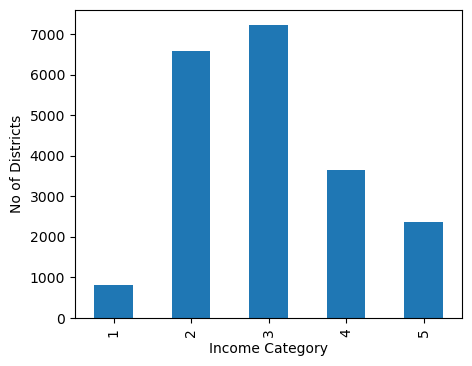

In [23]:
data["income_cat"].value_counts().sort_index().plot.bar(figsize =(5,4))
plt.xlabel("Income Category")
plt.ylabel("No of Districts")
plt.show()

In [29]:
train_set, test_set = train_test_split(data, test_size = 0.2,
                                       stratify = data["income_cat"],
                                     random_state = 42)
train_set.shape, test_set.shape

((16512, 11), (4128, 11))

In [35]:
# removing the income_cat column as it will not be used again
if "income_cat" in test_set.columns and "income_cat" in train_set.columns:
    train_set.drop(["income_cat"], axis = 1, inplace = True)
    test_set.drop(["income_cat"], axis = 1, inplace = True)
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

## 2.2 Creating X_features and y_labels

In [36]:
X_train = train_set.drop(["median_house_value"], axis = 1)
y_train = train_set["median_house_value"].copy()
X_test = test_set.drop(["median_house_value"], axis = 1)
y_test = test_set["median_house_value"].copy()

X_train.shape, y_train.shape, X_test.shape, y_train.shape

((16512, 9), (16512,), (4128, 9), (16512,))

# 3. Selecting a Model

## 3.1 LinearRegression Model

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline, Pipeline

lin_reg = make_pipeline(preprocessing,LinearRegression())
lin_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('impute',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardize',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x143e92700>,
                                                                                       fu...
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('1hot_encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x142de3770>)])),
                ('linearregression', LinearRegression())])

In [41]:
lin_reg.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('impute',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardize',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x143e92700>,
                                                                                       fu...
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('1hot_encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x142de3770>)])),
                ('linearregression', LinearRegression())])

In [64]:
# Testing the prediction on few training instances
predictions_lin_reg = lin_reg.predict(X_train)

predictions_lin_reg[:5].round(-1) #round to nearest 100

array([242760., 375860., 127480.,  99360., 324610.])

In [65]:
y_train[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

##  3.2 Creating RMSE Metric

In [66]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(np.array([4]),np.array([3]))

1.0

In [67]:
# Rmse of the model predictions
lin_reg_rmse = root_mean_squared_error(y_train,predictions_lin_reg)
lin_reg_rmse

68647.95686706656

**68647 is a very high error**

## 3.3 DecisionTreeRegressor 

In [69]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = make_pipeline(preprocessing,
                             DecisionTreeRegressor(random_state = 42))

decision_tree.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('impute',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardize',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x143e92700>,
                                                                                       fu...
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('1hot_encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x142de3770>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [73]:
decision_tree_predictions = decision_tree.predict(X_train)
decision_tree_rmse = root_mean_squared_error(y_train,decision_tree_predictions)
decision_tree_rmse

0.0

Seems Like the model is overfitting the data and the loss is 0.0.
Evaluationg predictions using Cross-Validation for better measurement

## 3.3 Evaluation using Cross-Validation

In [75]:
from sklearn.model_selection import cross_val_score

decision_tree_rmse = -cross_val_score(decision_tree,
                                     X_train, y_train,
                                     scoring = "neg_root_mean_squared_error",
                                     cv = 10) # 10 fold CV

In [76]:
pd.Series(decision_tree_rmse).describe()

count       10.000000
mean     67153.318273
std       1963.580924
min      63925.253106
25%      66083.277180
50%      66795.829871
75%      68074.018403
max      70664.635833
dtype: float64

In [80]:
linear_reg_rmse = -cross_val_score(lin_reg, X_train, y_train,
                                  scoring = "neg_root_mean_squared_error",
                                  cv = 10)
pd.Series(linear_reg_rmse).describe()

count       10.000000
mean     69852.836027
std       4081.177634
min      65661.312322
25%      68088.799156
50%      68700.024107
75%      69819.602439
max      80696.030241
dtype: float64

## 3.4 RandomForest Regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(
    random_state = 42
))
forest_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('impute',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardize',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x143e92700>,
                                                                                       fu...
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('1hot_encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x142de3770>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [83]:
forest_reg_rmse = -cross_val_score(forest_reg, X_train, y_train,
                                  scoring = "neg_root_mean_squared_error",
                                  cv = 10)
pd.Series(forest_reg_rmse).describe()

count       10.000000
mean     47002.931706
std       1048.451340
min      45667.064036
25%      46494.358345
50%      47093.173938
75%      47274.873814
max      49354.705514
dtype: float64

In [84]:
forest_reg.fit(X_train, y_train)
forest_reg_predictions = forest_reg.predict(X_train)
forest_reg_rmse_training_error = root_mean_squared_error(y_train,
                                                        forest_reg_predictions)
forest_reg_rmse_training_error

17547.52124624957

The `Cross Validation Error` is validation error and we can see,
for all the models:\
* `Training_error < Validation_error`\
This means that the model has overfitted the training set.

# 4. Fine Tune Model

**Choosing RandomForestRegressor as it was out best model and preforming hyperparameter tuning.**

## 4.1 Grid Search